# Titanic survivors exploratory data analysis

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Context

In [41]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [12]:
# The number of numeric columns in the dataset
numerics = ['int64', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

7

## Data quality assessment

In [39]:
# Checking for duplicates
duplicates = df[df.duplicated()] 
duplicates

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [38]:
# Checking if there are age entries that don't make sense (below 0 or above 122 years old)
df[(df['Age'] <= 0) | (df['Age'] >= 122)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [33]:
# Checking if there are sex entries that don't make sense (not male nor female)
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# Checking wrong entries like symbols -, ?, #, *
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

In [35]:
# Number of missing values
missing_count = sum(df.isnull().sum())
missing_count

76165

Cabin          0.67866
Ticket         0.04623
Age            0.03292
Embarked       0.00250
Fare           0.00134
Parch          0.00000
SibSp          0.00000
Sex            0.00000
Name           0.00000
Pclass         0.00000
Survived       0.00000
PassengerId    0.00000
dtype: float64

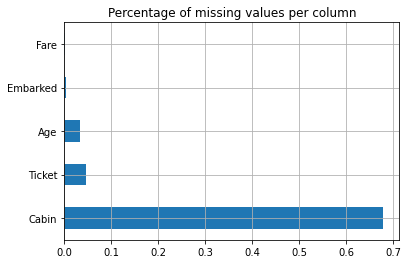

In [50]:
# Percentage of missing values per column
missing_percentage = df.isna().sum().sort_values(ascending=False) / len(df)
missing_columns = missing_percentage[missing_percentage != 0]
missing_columns.plot(kind='barh', title='Percentage of missing values per column', grid=True)
missing_percentage

In [112]:
# Filling missing Age values with median data
df['Age'] = df['Age'].fillna(df['Age'].median)

## Data exploration

### Feature description
- **Pclass** - 1 is an upper, 2 is a middle and 3 is a lower class;
- **Sex** - male/female;
- **Age** - estimated age of the passenger;
- **SibSp** - number of siblings / spouses aboard;
- **Parch** - number of parents / children aboard;
- **Fare** - ticket fare;
- **Cabin** - the cabin number;
- **Emarked** - port: C (Cherbourg), Q (Queenstown) and S (Southampton);
- **Ticket** - ticket number;
- **Name** - name of the passanger;
- **Survived** - 0 means not survived, 1 is survived.

#### Survived

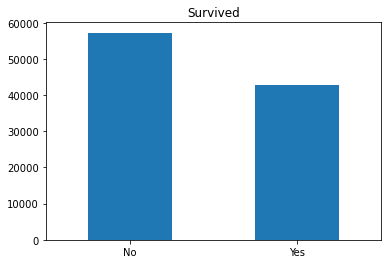

In [58]:
ax = df['Survived'].replace({
    0: 'No',
    1: 'Yes'
}).value_counts().plot.bar(rot=0)
ax.set_title('Survived')
plt.show()

In [60]:
survival_percent = df['Survived'].replace({
    0: 'No',
    1: 'Yes'
}).value_counts() / len(df['Survived'])
survival_percent

No     0.57226
Yes    0.42774
Name: Survived, dtype: float64

#### Age

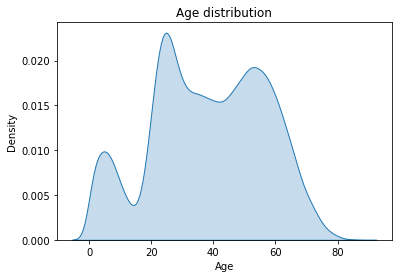

In [73]:
age_plot = sns.kdeplot(data=df['Age'], shade=True).set(title='Age distribution')

In [46]:
df['Age'].describe()

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

In [47]:
df['Age'].corr(df['Survived'])

0.1038946456061571

[Text(0.5, 1.0, 'Comparison of the number of survived and non-survived passengers of different ages')]

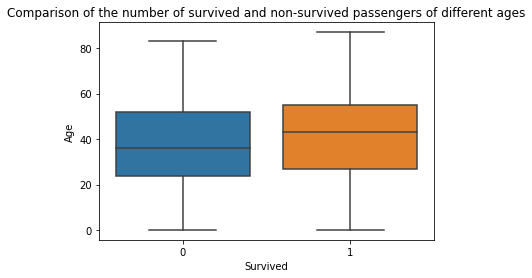

In [78]:
sns.boxplot(data=df, x = 'Survived', y='Age').set(title='Comparison of the number of survived and non-survived passengers of different ages')

#### Passenger class

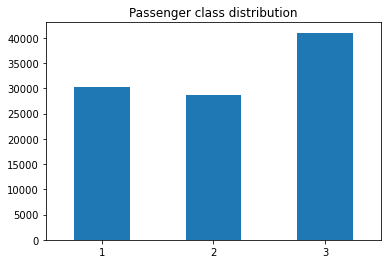

In [69]:
ax = df['Pclass'].value_counts().sort_index().plot.bar(rot=0)
ax.set_title('Passenger class distribution')
plt.show()

In [63]:
class_percent = df['Pclass'].value_counts() / len(df['Pclass'])
class_percent

3    0.41006
1    0.30315
2    0.28679
Name: Pclass, dtype: float64

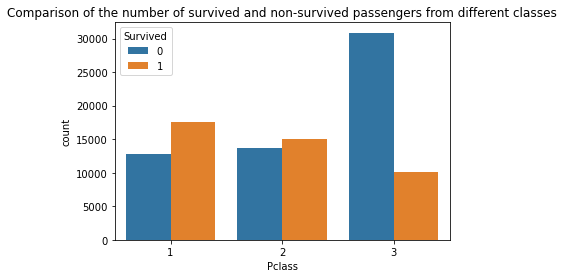

In [65]:
ax = sns.countplot(data = df, x = 'Pclass', hue = 'Survived')
ax.set_title('Comparison of the number of survived and non-survived passengers from different classes')
plt.show()

In [67]:
df['Pclass'].corr(df['Survived'])

-0.2897225739313115

#### Sex

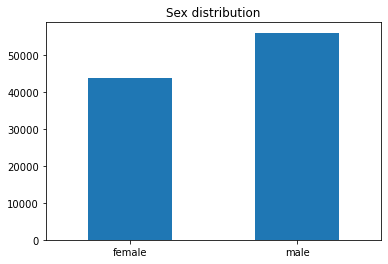

In [79]:
ax = df['Sex'].value_counts().sort_index().plot.bar(rot=0)
ax.set_title('Sex distribution')
plt.show()

In [82]:
sex_percent = df['Sex'].value_counts() / len(df['Sex'])
sex_percent

male      0.56114
female    0.43886
Name: Sex, dtype: float64

In [87]:
df['Sex'].corr(df['Survived'], 'spearman')

-0.5072600695322245

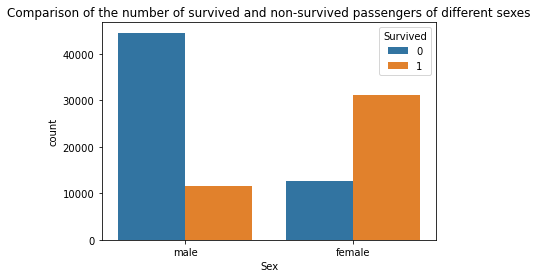

In [80]:
sns.countplot(data = df, x = 'Sex', hue = 'Survived').set(title='Comparison of the number of survived and non-survived passengers of different sexes')
plt.show()

#### Siblings / spouse

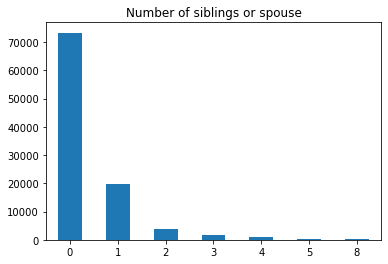

In [84]:
df['SibSp'].value_counts().sort_index().plot.bar(rot=0)
plt.title('Number of siblings or spouse')
plt.show()

In [86]:
df['SibSp'].corr(df['Survived'], 'spearman')

0.0016842617589696335

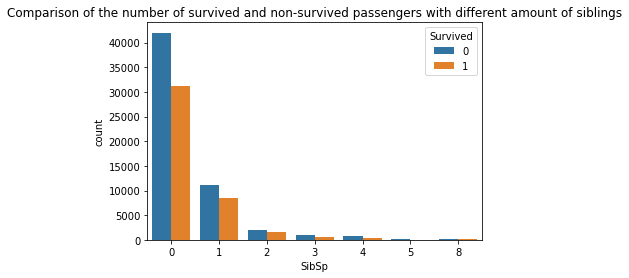

In [89]:
sns.countplot(data = df, x = 'SibSp', hue = 'Survived').set(title='Comparison of the number of survived and non-survived passengers with different amount of siblings')
plt.show()

#### Parents / children

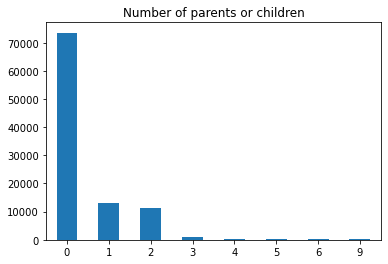

In [90]:
df['Parch'].value_counts().sort_index().plot.bar(rot=0)
plt.title('Number of parents or children')
plt.show()

In [91]:
df['Parch'].corr(df['Survived'], 'spearman')

0.05961848254535862

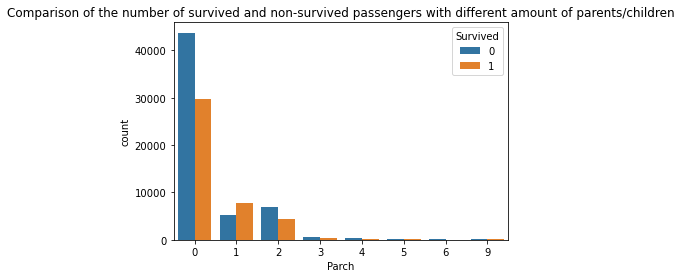

In [92]:
sns.countplot(data = df, x = 'Parch', hue = 'Survived').set(title='Comparison of the number of survived and non-survived passengers with different amount of parents/children')
plt.show()

#### Fare

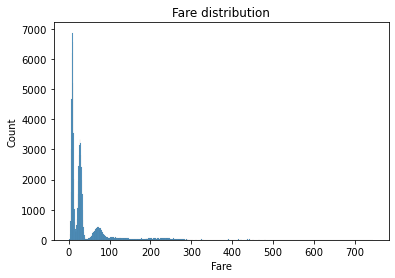

In [94]:
sns.histplot(df['Fare'])
plt.title('Fare distribution')
plt.show()

[Text(0.5, 1.0, 'Comparison of the number of survived and non-survived passengers of different fares')]

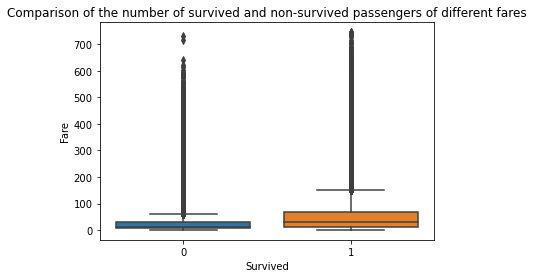

In [96]:
sns.boxplot(data=df, x = 'Survived', y='Fare').set(title='Comparison of the number of survived and non-survived passengers of different fares')

In [97]:
df['Fare'].corr(df['Survived'], 'spearman')

0.27400879832397634

#### Cabin

In [98]:
# Cabin letters, numbers and null values
df['cabin_number'] = df['Cabin'].str.extract('(\d+)').astype('float64')
df['cabin_letter'] = df['Cabin'].str.extract('([A-Za-z])')
df['cabin_null'] = df['Cabin'].isnull()

In [99]:
# Passengers with/without cabin survival
pd.crosstab(df['cabin_null'], df['Survived']).div(df['cabin_null'].value_counts().sort_index(), axis='rows')

Survived,0,1
cabin_null,,
False,0.391392,0.608608
True,0.657899,0.342101


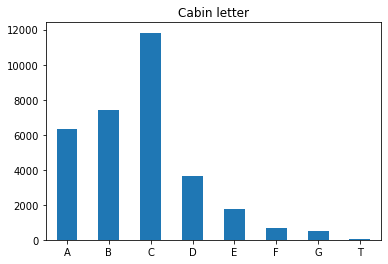

In [101]:
# Cabin letter values count
df['cabin_letter'].value_counts().sort_index().plot.bar(rot=0)
plt.title('Cabin letter')
plt.show()

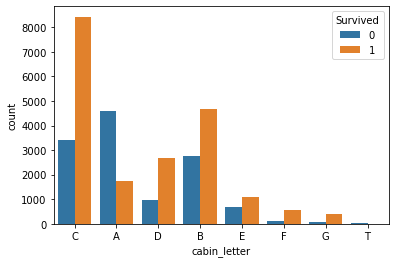

In [102]:
sns.countplot(data = df, x = 'cabin_letter', hue = 'Survived')
plt.show()

In [103]:
df['cabin_letter'].corr(df['Survived'], 'spearman')

0.2845368519721612

<AxesSubplot:xlabel='cabin_number', ylabel='Count'>

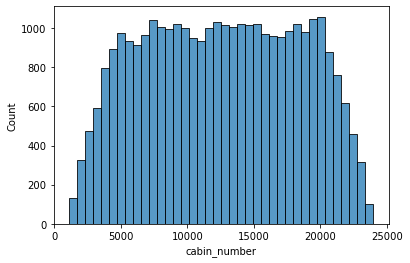

In [104]:
# Cabin number distribution
sns.histplot(df['cabin_number'])

<AxesSubplot:xlabel='Survived', ylabel='cabin_number'>

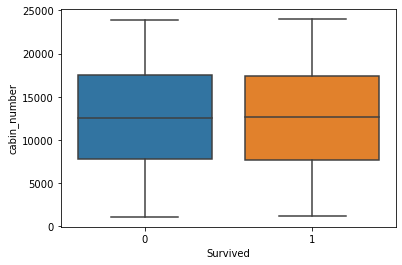

In [105]:
sns.boxplot(data=df, x = 'Survived', y = 'cabin_number')

In [ ]:
#### Embarked

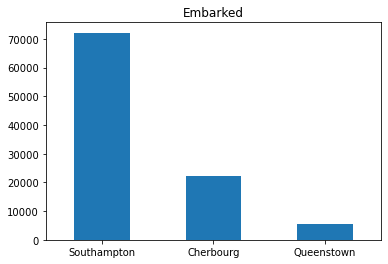

In [106]:
ax = df['Embarked'].replace({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
}).value_counts().plot.bar(rot=0)
ax.set_title('Embarked')
plt.show()

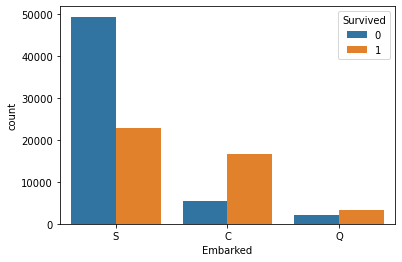

In [108]:
sns.countplot(data = df, x = 'Embarked', hue = 'Survived')
plt.show()

In [109]:
df['Embarked'].corr(df['Survived'], 'spearman')

-0.3722231712174781

## Summary

### Data quality observations
- There are no duplicated in the dataset
- There are 76165 missing values in the dataset
- Columns with missing values are Cabin, Ticket, Age, Embarked and Fare
- Column Cabin has 67.8% of missing values (can be a mistake, can be real data (passengers without cabins))
- Age missing values were filled with median values

### Feature observations
#### Survived
- 57.23% of passengers didn't survived the trip

#### Age
- Mean age is 35 years old
- Age distribution has peaks around 8, 25 and 55 years
- Correlation between age and survival equals 0.1 which is low
- Older passengers (above 40) have a little more probability to survive

#### Passenger class
- 41% of passengers travelled in the third class, there were about the same number of passengers in the first and the second class 
- Passengers from the third class are less likely to survive
- Correlation between passenger class and survival is not high (-0.29)

#### Sex 
- There are 56% of male passengers
- There is a strong dependency between sex and survival - women have much more probability to survive 

#### Siblings / spouse
- Most of the passengers don't have any siblings or spouse
- Correlation between siblings/spouse presence and survival almost equals 0

#### Parents / children
- Most of the passengers travel without parents/children
- Correlation between children/parents presence and survival a bit higher than previous, but still almost equals 0

#### Fare
- There is a dependency between ticket's cost and survival (Spearman coefficient equals 0.274)
- People with more expensive tickes have more chances to survive

#### Cabin
- Cabin information is missing the most
- Cabin has letter and number values
- Cabin presence and survival have a noticable dependency
- 65.79% passengers without cabin didn't survive the trip
- The most popular cabin letter 'C' (almost 12000) has the highest survival rate 
- Cabin number distribution is random and doesn't have correlation with passenger survival

#### Embarked
- The most popular place is Southampton
- There is a correlation between embarked and survival